In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the data and stored inside path variables
path = '/content/drive/MyDrive/house_data.csv'

In [ ]:
df = pd.read_csv(path)
print(df.shape)

(21575, 8)


In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
count,2.157500e+04,21575.000000,21575.000000,21575.000000,2.157500e+04,21575.000000,21575.000000,21575.000000
mean,5.383716e+05,3.369826,2.113105,2076.706373,1.509372e+04,1.494276,1786.426559,1971.007416
std,3.642894e+05,0.929871,0.769125,915.433561,4.144629e+04,0.540089,826.457010,29.372485
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,1900.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,1190.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.611000e+03,1.500000,1560.000000,1975.000000
75%,6.412250e+05,4.000000,2.500000,2550.000000,1.066000e+04,2.000000,2210.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   sqft_above   21575 non-null  int64  
 7   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


Now with the help of seaborn, let's visualize the given data.

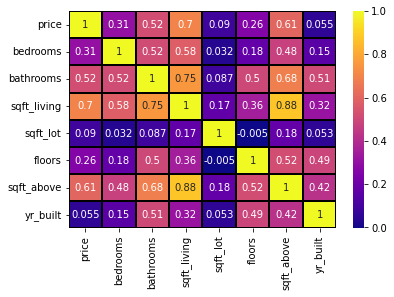

In [ ]:
tc = df.corr()
sns.heatmap(tc,annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 1)

In [ ]:
#dropping col yr_built
df.drop('yr_built',axis=1,inplace=True)

In [ ]:
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
0,221900.0,3,1.00,1180,5650,1.0,1180
1,538000.0,3,2.25,2570,7242,2.0,2170
2,180000.0,2,1.00,770,10000,1.0,770
3,604000.0,4,3.00,1960,5000,1.0,1050
4,510000.0,3,2.00,1680,8080,1.0,1680


Here we divide our data into train and test using sk learn model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
0,3,1.00,1180,5650,1.0,1180
1,3,2.25,2570,7242,2.0,2170
2,2,1.00,770,10000,1.0,770
3,4,3.00,1960,5000,1.0,1050
4,3,2.00,1680,8080,1.0,1680


In [ ]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing Random Forest Regressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
from sklearn import metrics

print('Regressor Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Regressor Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Regressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regressor Mean Absolute Error (MAE): 153465.7102047455
Regressor Mean Squared Error (MSE): 57657008811.42463
Regressor Root Mean Squared Error: 240118.73898432966


# Implementing LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics

print('LR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('LR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('LR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LR Mean Absolute Error: 169612.2430301144
LR Mean Squared Error: 64298004973.24443
LR Root Mean Squared Error: 253570.51282285256


# Implementing Random Forest Regressor using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#defining the parameters 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rfr = RandomForestRegressor(random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

In [ ]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


In [ ]:
rfr = RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 'auto', n_estimators= 15)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=15)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
#calculating accuracy after hyper-parameter tuning
from sklearn import metrics

print('after-tunung rfr Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('after-tunung rfr Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('after-tunung rfr Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

after-tunung rfr Mean Absolute Error: 150674.74615611267
after-tunung rfr Mean Squared Error: 56833935669.41093
after-tunung rfr Root Mean Squared Error: 238398.6905782222


#Implementing Random Forest using Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
                       'max_features': ['auto', 'log2'],
                       'max_depth': [5,10,None],
                       'bootstrap': [True]}

In [ ]:
r_search = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=0, random_state=100 , n_jobs = -1)

In [ ]:
r_search.fit(X_train, y_train);

In [ ]:
print(r_search.best_params_)

{'n_estimators': 13, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [ ]:
rfr_random = RandomForestRegressor(**r_search.best_params_)

In [ ]:
rfr_random.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=13)

In [ ]:
y_pred_random = rfr.predict(X_test)

In [ ]:
#calculating accuracy after hyper-parameter tuning
from sklearn import metrics

print('after-tuining rfr Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_random))
print('after-tuining rfr Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random))
print('after-tuining rfr Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

after-tuining rfr Mean Absolute Error: 150674.74615611267
after-tuining rfr Mean Squared Error: 56833935669.41093
after-tuining rfr Root Mean Squared Error: 238398.6905782222


#Conclusion
At first,, Both the GridSearch and Randomized search has the same result.
And lastly, in comaprision between Linear regression and Random forest, random forest gives the better result.